# 02 - Phân nhóm bệnh nhân (Segmentation)

Clustering: K-Means, DBSCAN - phân tích từng nhóm bệnh nhân dựa trên biến số liên tục.

## 1. Import thư viện & nạp dữ liệu
- Import các thư viện cần thiết
- Đọc dữ liệu từ file CSV
- Tiền xử lý cơ bản: chọn các biến số, chuẩn hóa dữ liệu

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
%matplotlib inline

file_path = '../healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'stroke' in numeric_cols:
    numeric_cols.remove('stroke')
X = df[numeric_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. Phân cụm KMeans
- Chạy KMeans với nhiều số cụm khác nhau
- Đánh giá silhouette score để chọn số cụm tối ưu
- Vẽ biểu đồ Elbow và Silhouette

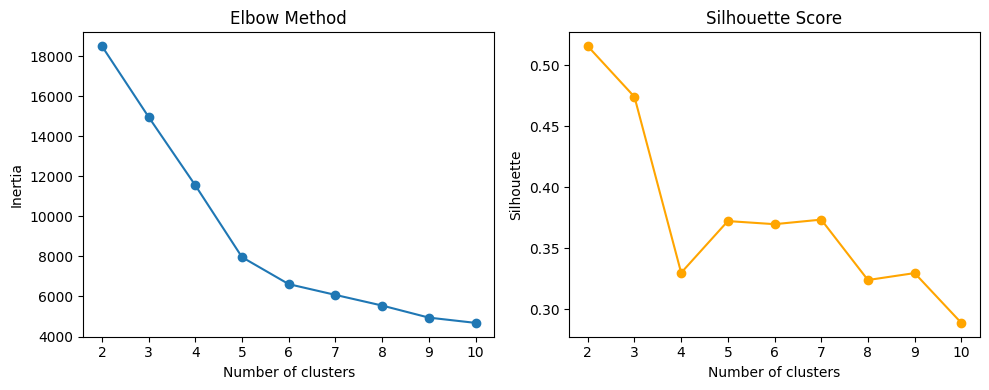

In [12]:
# Tìm số cụm tối ưu với Elbow & Silhouette
inertia = []
silhouette = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
plt.plot(k_range, silhouette, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.tight_layout()
plt.show()

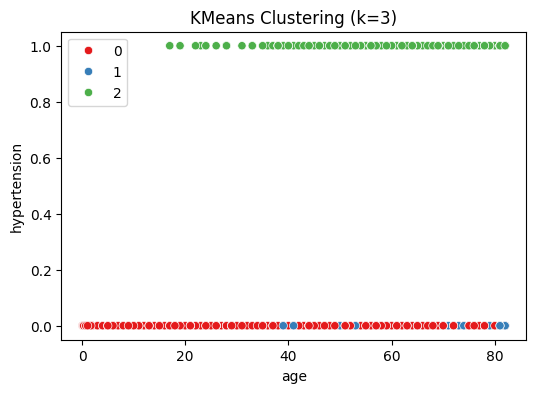

In [13]:
# Chạy KMeans với số cụm tối ưu (ví dụ: 3, bạn chọn lại sau khi xem biểu đồ)
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['kmeans_cluster'] = -1
df.loc[X.index, 'kmeans_cluster'] = kmeans_labels

# Trực quan hóa kết quả phân cụm (2 biến đầu tiên)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=kmeans_labels, palette='Set1')
plt.title(f'KMeans Clustering (k={k_opt})')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

## 3. Phân cụm DBSCAN
- Chạy DBSCAN với các giá trị epsilon khác nhau
- Đánh giá số lượng cụm và silhouette score
- Trực quan hóa kết quả

eps=0.3: clusters=23, silhouette=0.003236687460128004


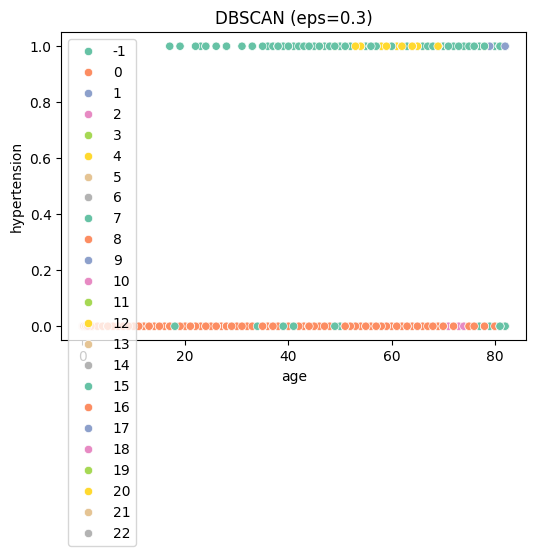

eps=0.5: clusters=8, silhouette=0.4628425160928243


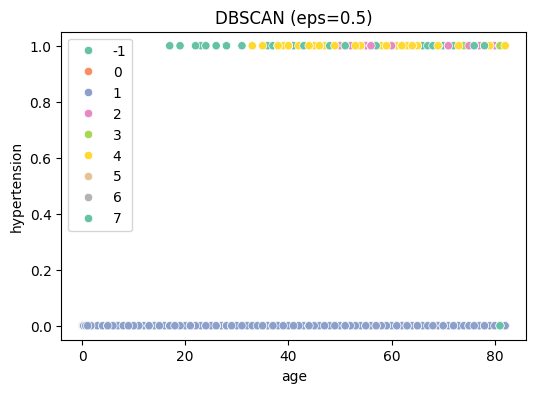

eps=0.7: clusters=7, silhouette=0.499635969027041


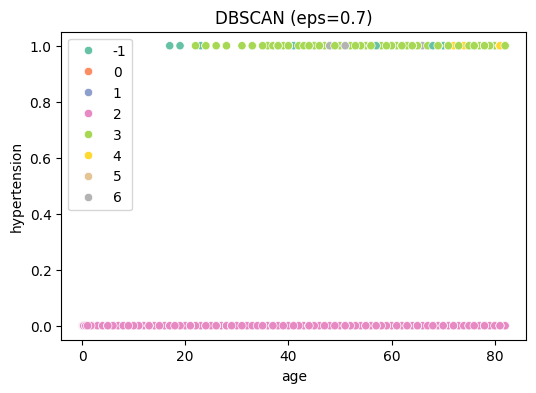

eps=1.0: clusters=5, silhouette=0.5166565273832336


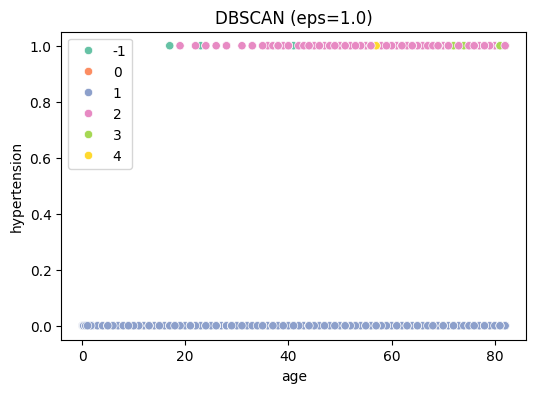

In [14]:
# Chạy DBSCAN với epsilon khác nhau
from collections import Counter

eps_values = [0.3, 0.5, 0.7, 1.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    db_labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
    sil = silhouette_score(X_scaled, db_labels) if n_clusters > 1 else None
    print(f"eps={eps}: clusters={n_clusters}, silhouette={sil}")
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=db_labels, palette='Set2')
    plt.title(f'DBSCAN (eps={eps})')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

df['dbscan_cluster'] = -1
df.loc[X.index, 'dbscan_cluster'] = dbscan.fit_predict(X_scaled)

## 4. Đánh giá & Nhận xét kết quả phân cụm
- So sánh kết quả KMeans và DBSCAN
- Đưa ra nhận xét về số lượng cụm, chất lượng phân cụm, ý nghĩa thực tiễn

### Gợi ý nhận xét mẫu:
- KMeans phân cụm thành ... nhóm, DBSCAN phân cụm thành ... nhóm (với epsilon tối ưu).
- Silhouette score của KMeans/DBSCAN là ...
- Một số nhóm có ý nghĩa thực tiễn rõ rệt/dễ bị trùng lắp.
- Cần kiểm tra lại các biến đầu vào, thử thêm các biến khác hoặc giảm chiều dữ liệu nếu cần.